In [8]:
%matplotlib notebook

import numpy as np
import scipy.stats as sp

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits import mplot3d
import statistics as stat

import pandas as pd 

In [ ]:
test = np.zeros((100,200,4)) # first energy, rows of numbers, the 4 variables 
pene_binned = np.zeros((1000,2)) # 1st row bins (to 100nm), 2nd # of instances 

print(pene_binned)

In [ ]:
#Only need to run this if its the first go around.... otherwise the files will have already been created 

# will load in each histogram one by one, check each penetration value against a histogram bin of 0.1 nm resolution, 
# and then add one to the count of that bin, then will take binned values and pring that to a file 
pene_binned = np.zeros((2000,2)) # 1st row bins (to 100nm), 2nd # of instances 

#print(pene_binned)

#setting up bin resolution: 
for y in range(0,2000):
    if y == 0: 
        pene_binned[0,0] = 0.1
    else:         
        pene_binned[y,0] = y/10.0 +0.1

print(pene_binned)

# reading in file and looking at the penetration number and placing it in a bin 
for e in range(6,26): 
    
    file = 'data/histogram/histogram%dC.res' % (e)
    print(file)
    loop = True
    i=0
    array_run = np.loadtxt(file)
    writefile = 'analyzed_histC_%d.txt' % (e)
    print(writefile)
    
# looping over the number of iterations to bin the distance value appropriatley 
    for x in range(1,100001): 
        n = 4*(x-1)+1 # sequence based on the numbers to extract pene values 
        pene = round(array_run[(n)],4)
        #print('pene', pene)

# making sure the value is within the size of alloted array and checks it against current bin value
        while loop:
            if (i < 2000):
                bin_num = round(pene_binned[i,0],2)
                # print(bin_num)
                if (pene < bin_num): 
                    pene_binned[i,1] += 1/100000
                   # print('i',i, pene_binned[i,1])
                    loop = False
                else: #(pene > bin_num): 
                    i = i+1 
            else:
                print('i', i, 'pene', pene)
                loop = False
                
        loop = True # reset loop to true for next x value      
        i = 0 # reset i value
    
    
    np.savetxt(writefile, pene_binned, delimiter=',')
    #print(pene_binned)
    
    pene_binned[:,1] = 0
   # print(pene_binned[:,:])

In [2]:
# take the newly created files, and make an array that can be used to plot a 3d graph and also the y-function, 
# only working with the first 100 nm of data (the 1st 1000 rows)

average_array = np.zeros((1000,101))
y_func = np.zeros((1000,101))
cmltve_sum = np.zeros(1000)

ave_arrayC = np.zeros((1000,26))
y_funcC = np.zeros((1000,26))
cmltve_sumC = np.zeros(1000)

# loop over the energy files to load data (100 energies) 
for e in range(1,101): 
    
    datafile = 'analyzedData/hist/analyzed_hist_%d.txt' % (e)
    data_binned = np.loadtxt(datafile, delimiter=',')
    the_sum = round(np.sum(data_binned[0:1000,1]),4)

    
    if (e < 26): 
        datafileC = 'analyzedData/hist/analyzed_histC_%d.txt' % (e)
        data_binnedC = np.loadtxt(datafileC,delimiter=',')
        sum_C = round(np.sum(data_binnedC[0:1000,1]),4)
      
        
# create the cumulative sum for the y-function  
    for i in range(0,1000):
        if (i == 0):
            value  = data_binned[i,1]
            valC = data_binnedC[i,1]
            cmltve_sumC[i] = valC
        elif (e <=25): 
            value = data_binned[i,1] + cmltve_sum[i-1]
            valC = data_binnedC[i,1] + cmltve_sumC[i-1]
            cmltve_sumC[i] = valC 
        else: 
            value = data_binned[i,1] + cmltve_sum[i-1]
                   
        cmltve_sum[i] = value
    

# set the vlaues to be graphed into the designated arrays    
    if (e == 1): 
        # first column = bin resolution
        average_array[:,0] = data_binned[0:1000,0]
        y_func[:,0] = data_binned[0:1000,0]
        ave_arrayC[:,0] = data_binnedC[0:1000,0]
        y_funcC[:,0] = data_binnedC[0:1000,0]
        # 2nd column = 1eV energy data 
        average_array[:,1] = data_binned[0:1000,1]
        y_func[:,1] = cmltve_sum/the_sum
        ave_arrayC[:,1] = data_binnedC[0:1000,1]
        y_funcC[:,1] = cmltve_sumC/sum_C 
    elif (e <= 25): 
        average_array[:,e] = data_binned[0:1000,1]
        y_func[:,e] = cmltve_sum/the_sum
        ave_arrayC[:,e] = data_binnedC[0:1000,1]
        y_funcC[:,e] = cmltve_sumC/sum_C 
    else: 
        average_array[:,e] = data_binned[0:1000,1]
        y_func[:,e] = cmltve_sum/the_sum
        
print('y-func')
print(y_func[:,0:6])
print('average array')
print(average_array[:,0:6])
print('columb')
print(y_funcC[:,:], ave_arrayC[:,:])

            

y-func
[[1.000e-01 4.376e-02 2.890e-03 1.500e-03 1.360e-03 1.170e-03]
 [2.000e-01 8.885e-02 6.260e-03 3.090e-03 2.740e-03 2.530e-03]
 [3.000e-01 1.367e-01 1.053e-02 4.600e-03 4.320e-03 3.820e-03]
 ...
 [9.980e+01 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [9.990e+01 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+02 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]]
average array
[[1.000e-01 4.376e-02 2.890e-03 1.500e-03 1.360e-03 1.170e-03]
 [2.000e-01 4.509e-02 3.370e-03 1.590e-03 1.380e-03 1.360e-03]
 [3.000e-01 4.785e-02 4.270e-03 1.510e-03 1.580e-03 1.290e-03]
 ...
 [9.980e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [9.990e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+02 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]]
columb
[[1.0000e-01 6.0860e-02 5.4500e-03 ... 1.1000e-03 1.0800e-03 9.0000e-04]
 [2.0000e-01 1.1410e-01 9.5700e-03 ... 2.1900e-03 2.0500e-03 1.6700e-03]
 [3.0000e-01 1.6732e-01 1.4260e-02 ... 3.5600e-03 2.9600e-

In [3]:
# get the frequency values for both Coulomb and non-Coulomb energies 

import linecache as lc 

freq_values = np.zeros((101,13))
freq_values_C = np.zeros((26,13))
DEA = np.zeros(101)
DEA_C = np.zeros(26)
gem_cap = np.zeros(101)
gem_cap_C = np.zeros(26)

# loop over the energy files to load data (100 energies) 
for e in range(1,101): 
    
    datafile = 'data/freq/simuln%d.res' % (e)  
    freq_values[e,0] = e
    
    reac_cap = lc.getline(datafile, 35)
    value = reac_cap[33:len(reac_cap)]
    DEA[e] = float(value.strip())
    
    
    
    if (e < 26): 
        datafile_C = 'data/freq/simuln%dC.res' %(e)
        freq_values_C[e,0] = e
    
        reac_cap_C = lc.getline(datafile_C, 35)
        value_C = reac_cap_C[33:len(reac_cap_C)]
        DEA_C[e] = float(value_C.strip())
    
    # loop over the last lines in the file 
    for line_Num in range(40,52): 
        full_line = lc.getline(datafile,line_Num)
        trim_line = full_line[33:len(full_line)]
        trim_line = float(trim_line.strip())
        
        freq_values[e,line_Num -39] = trim_line
        
        if (e < 26): 
            full_line_C = lc.getline(datafile_C,line_Num+1)
            trim_line_C = full_line_C[33:len(full_line_C)]
            trim_line_C = float(trim_line_C.strip())
            
            freq_values_C[e,line_Num-39] = trim_line_C
        
# E, elastic, v2, v13, vr, t1, t2, l1, l2, tot. exc., ioni, exc, capture
print(DEA)
print(DEA_C)

[0.      0.      0.      0.      0.      0.32625 0.45534 0.75809 0.79642
 0.73092 0.91119 0.82151 0.28068 0.08813 0.07146 0.10287 0.13843 0.15766
 0.1692  0.18348 0.18794 0.19526 0.20948 0.23023 0.26159 0.28988 0.32209
 0.34967 0.36788 0.38462 0.38869 0.38556 0.36844 0.35605 0.33909 0.32439
 0.31103 0.30431 0.29329 0.28685 0.28172 0.28483 0.28436 0.28373 0.28876
 0.29224 0.2928  0.29923 0.30397 0.30858 0.31179 0.31292 0.31135 0.31075
 0.31371 0.31206 0.31155 0.31186 0.31059 0.30975 0.30711 0.30717 0.30615
 0.30596 0.30608 0.30416 0.3018  0.30517 0.30697 0.3073  0.305   0.30472
 0.30843 0.30572 0.30606 0.30678 0.30931 0.30776 0.30932 0.30871 0.30663
 0.30794 0.30449 0.30694 0.30409 0.30651 0.30745 0.3078  0.30677 0.30524
 0.30485 0.30607 0.30373 0.30501 0.3069  0.30828 0.30738 0.30715 0.30877
 0.30683 0.30761]
[0.      0.      0.      0.      0.      0.1878  0.30174 0.54208 0.70274
 0.70417 0.82606 0.85486 0.61245 0.36455 0.21589 0.13917 0.11425 0.11532
 0.12471 0.13798 0.15246 0.1624  

In [13]:
## import the freq_lee_25.csv file, it is the frequency of the low energy electrons that occur from a primary particle 
#lee_freq = np.zeros((25,2))
#print(lee_freq)

#for e in range(1,26):
 #   line = lc.getline("freq_lee_25.csv", e+1)
 #   lee_freq[e-1,:] = [e,
#print(lee_freq)
                       
lee_freq = pd.read_csv("freq_lee_25.csv")
print(lee_freq)

    Energy bin / <eV  Frequency
0                  1      0.269
1                  2      0.033
2                  3      0.032
3                  4      0.030
4                  5      0.031
5                  6      0.031
6                  7      0.031
7                  8      0.031
8                  9      0.030
9                 10      0.029
10                11      0.027
11                12      0.026
12                13      0.025
13                14      0.028
14                15      0.030
15                16      0.032
16                17      0.034
17                18      0.034
18                19      0.033
19                20      0.031
20                21      0.028
21                22      0.026
22                23      0.024
23                24      0.022
24                25      0.053


<IPython.core.display.Javascript object>


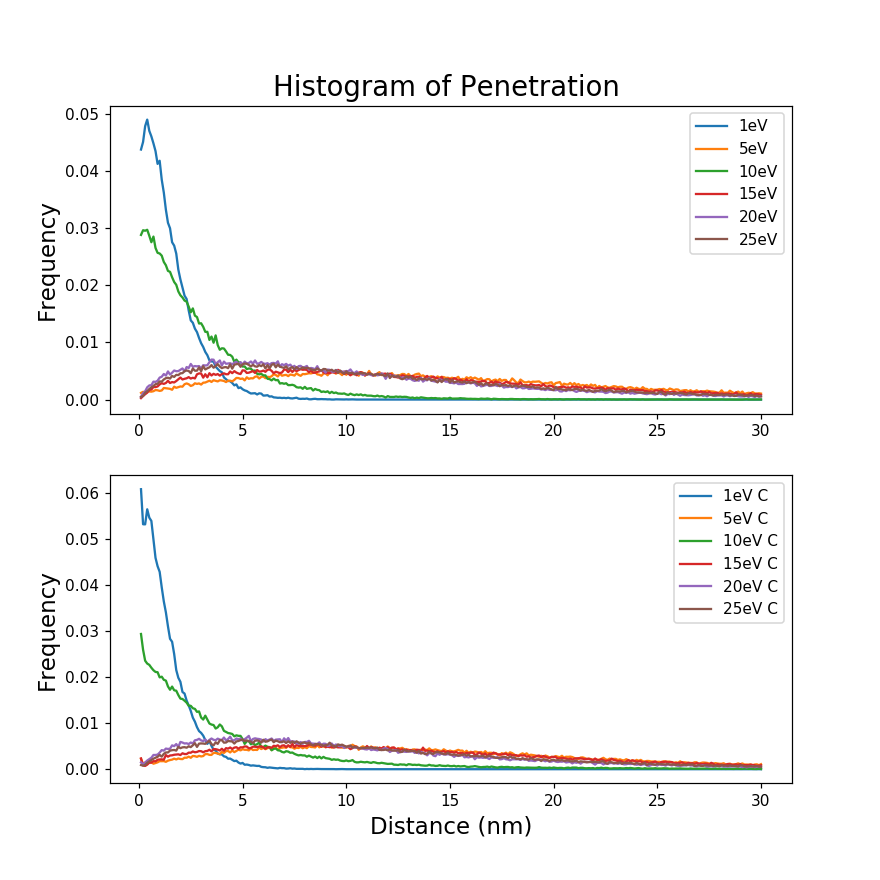

In [4]:
# plot some of the probability graphs together, interesting energies : 1,5,10,15,20,25 eV  
fig1 = plt.figure(figsize=(8,8))
ax1= fig1.add_subplot(211)

lgnd_labels = ('1eV', '5eV', '10eV', '15eV', '20eV', '25eV')
max_bin = 300

# plot of probability
plt.plot(average_array[0:max_bin,0], average_array[0:max_bin,1]) # 1 eV 
plt.plot(average_array[0:max_bin,0], average_array[0:max_bin,5:30:5]) # 5 eV - 25

ax1.legend(lgnd_labels)
ax1.set_title('Histogram of Penetration ', fontsize = 18)
ax1.set_ylabel("Frequency", fontsize = 15)
#ax1.set_xlabel("Distance (nm)", fontsize = 15);

ax1 = fig1.add_subplot(212)

lgnd_labels2 = ('1eV C', '5eV C', '10eV C', '15eV C', '20eV C', '25eV C')

plt.plot(ave_arrayC[0:max_bin,0], ave_arrayC[0:max_bin,1]) #,'--'
plt.plot(ave_arrayC[0:max_bin,0], ave_arrayC[0:max_bin,5:30:5])

ax1.legend(lgnd_labels2)
ax1.set_ylabel("Frequency", fontsize = 15)
ax1.set_xlabel("Distance (nm)", fontsize = 15);

[[1.00000e+00 2.08200e-01 1.31800e-02 5.72600e-02 1.19000e-03 0.00000e+00
  1.83070e-01 1.11820e-01 4.78300e-01 0.00000e+00 0.00000e+00 0.00000e+00
  9.99390e-01]
 [2.00000e+00 1.09222e+00 8.39800e-02 3.26290e-01 4.17700e-02 0.00000e+00
  9.77370e-01 5.70850e-01 2.29184e+00 0.00000e+00 0.00000e+00 0.00000e+00
  9.99950e-01]]


<IPython.core.display.Javascript object>


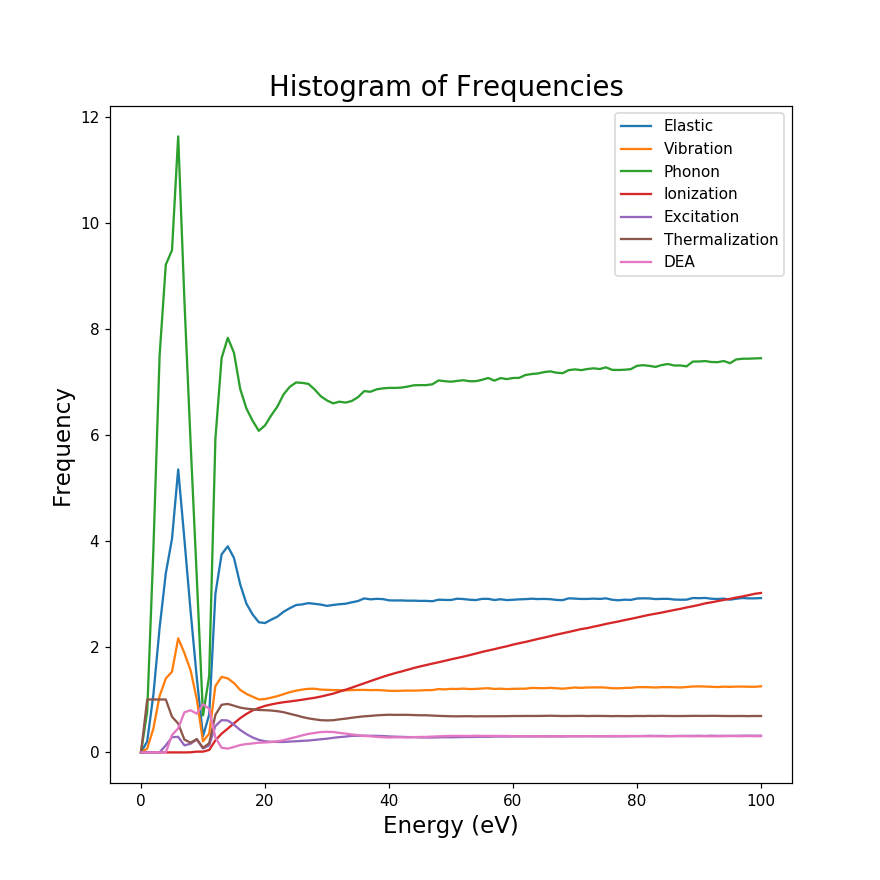

In [15]:
# plot of frequency graphs together 
print(freq_values[1:3, : ])

vibration = freq_values[:,2] + freq_values[:,3] + freq_values[:,4]
phonon = freq_values[:,5] + freq_values[:,6] + freq_values[:,7] + freq_values[:,8]
thermalization = freq_values[:,12] - DEA[:]

fig1 = plt.figure(figsize=(8,8))
ax1= fig1.add_subplot(111)

# lgnd_labels = ( 'elastic', 'v2', 'v13', 'vr', 't1', 't2', 'l1', 'l2', 'tot. exc.', 'ioni', 'exc', 'capture' )
lgnd_labels = ('Elastic', 'Vibration', 'Phonon', 'Ionization', 'Excitation', 'Thermalization', 'DEA' )

# plot of probability
plt.plot(freq_values[:,0], freq_values[:, 1]) # 
plt.plot(freq_values[:,0], vibration)
plt.plot(freq_values[:,0], phonon)
plt.plot(freq_values[:,0], freq_values[:, 10:12]) 
plt.plot(freq_values[:,0], thermalization[:])
plt.plot(freq_values[:,0], DEA[:])

ax1.legend(lgnd_labels)
ax1.set_title('Histogram of Frequencies ', fontsize = 18)
ax1.set_ylabel("Frequency", fontsize = 15)
ax1.set_xlabel("Energy (eV)", fontsize = 15);

plt.savefig("types_interactions.png")

<IPython.core.display.Javascript object>


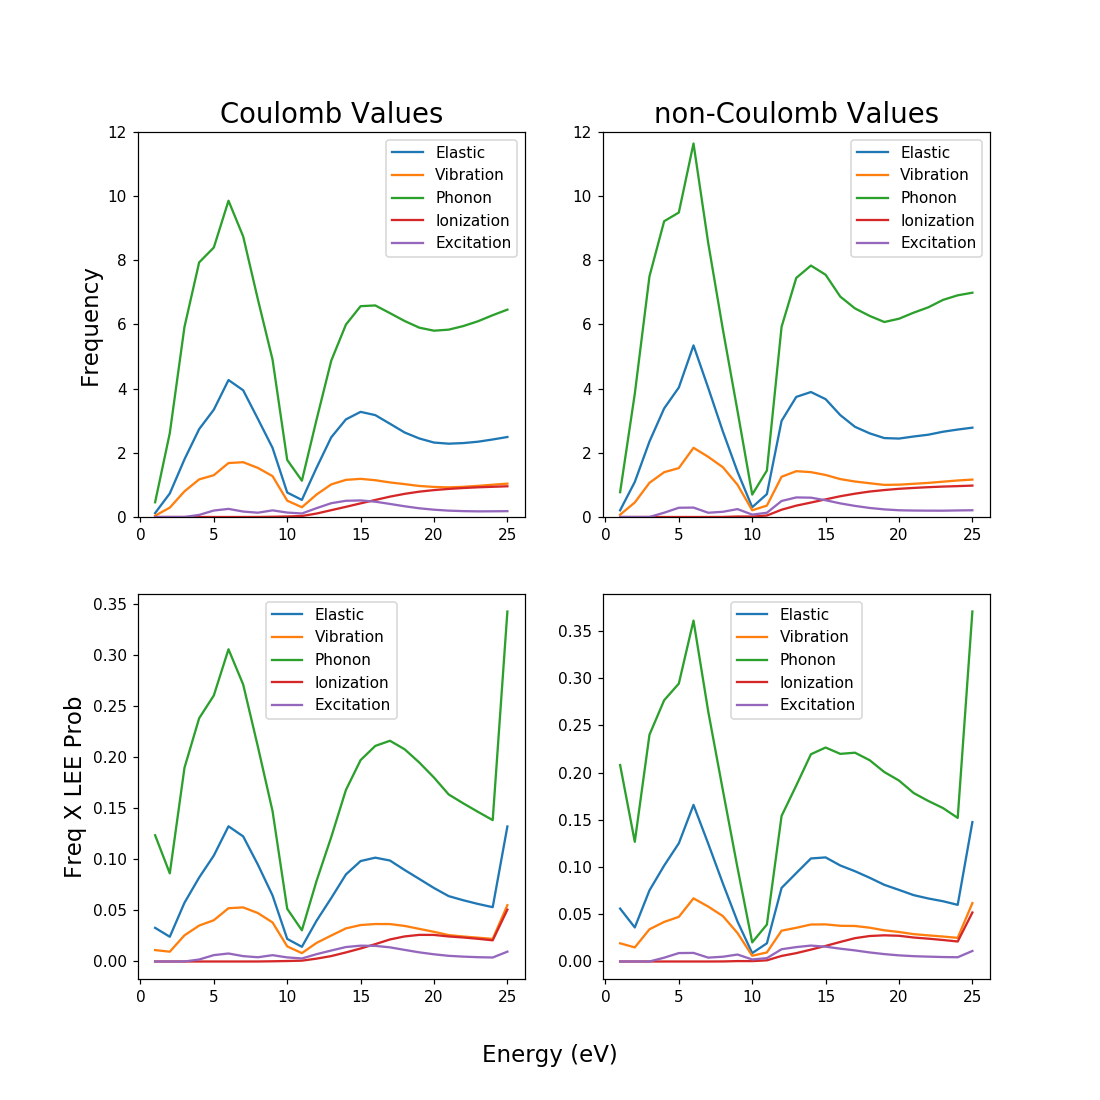

In [31]:
# plot of frequency graphs together 

vibration_C = freq_values_C[:,2] + freq_values_C[:,3] + freq_values_C[:,4]
phonon_C = freq_values_C[:,5] + freq_values_C[:,6] + freq_values_C[:,7] + freq_values_C[:,8]
thermalization_C = freq_values_C[:,12] - DEA_C[:]

# lgnd_labels = ( 'elastic', 'v2', 'v13', 'vr', 't1', 't2', 'l1', 'l2', 'tot. exc.', 'ioni', 'exc', 'capture' )
lgnd_labels = ('Elastic', 'Vibration', 'Phonon', 'Ionization', 'Excitation', 'Thermalization', 'DEA' )

fig1 = plt.figure(figsize=(10,10))
ax1= fig1.add_subplot(221)
# plot of coulomb vals
plt.plot(freq_values_C[1:26,0], freq_values_C[1:26, 1]) # 
plt.plot(freq_values_C[1:26,0], vibration_C[1:26])
plt.plot(freq_values_C[1:26,0], phonon_C[1:26])
plt.plot(freq_values_C[1:26,0], freq_values_C[1:26, 10:12]) 
#plt.plot(freq_values_C[1:26,0], thermalization_C[:])
#plt.plot(freq_values_C[1:26,0], DEA_C[:])

ax1.legend(lgnd_labels)
ax1.set_title('Coulomb Values', fontsize = 18)
ax1.set_ylabel("Frequency", fontsize = 15)
#ax1.set_xlabel("Distance (nm)", fontsize = 15);

ax1.set_ylim(0,12)

ax1= fig1.add_subplot(222)
# plot non-Coulomb vals
plt.plot(freq_values[1:26,0], freq_values[1:26, 1]) # 
plt.plot(freq_values[1:26,0], vibration[1:26])
plt.plot(freq_values[1:26,0], phonon[1:26])
plt.plot(freq_values[1:26,0], freq_values[1:26, 10:12]) 
#plt.plot(freq_values[0:26,0], thermalization[0:26])
#plt.plot(freq_values[0:26,0], DEA[0:26])

ax1.legend(lgnd_labels)
ax1.set_title('non-Coulomb Values', fontsize = 18)

ax1.set_ylim(0,12)

ax1= fig1.add_subplot(223)
# plot of coulomb vals
plt.plot(freq_values_C[1:26,0], freq_values_C[1:26, 1]*lee_freq["Frequency"]) # 
plt.plot(freq_values_C[1:26,0], vibration_C[1:26]*lee_freq["Frequency"])
plt.plot(freq_values_C[1:26,0], phonon_C[1:26]*lee_freq["Frequency"])
plt.plot(freq_values_C[1:26,0], freq_values_C[1:26, 10]*lee_freq["Frequency"]) 
plt.plot(freq_values_C[1:26,0], freq_values_C[1:26, 11]*lee_freq["Frequency"]) 
#plt.plot(freq_values_C[1:26,0], thermalization_C[:])
#plt.plot(freq_values_C[1:26,0], DEA_C[:])

ax1.legend(lgnd_labels)
ax1.set_ylabel("Freq X LEE Prob", fontsize = 15)
#ax1.set_xlabel("Distance (nm)", fontsize = 15);

#ax1.set_ylim(0,12)

ax1= fig1.add_subplot(224)
# plot non-Coulomb vals
plt.plot(freq_values[1:26,0], freq_values[1:26, 1]*lee_freq["Frequency"]) # 
plt.plot(freq_values[1:26,0], vibration[1:26]*lee_freq["Frequency"])
plt.plot(freq_values[1:26,0], phonon[1:26]*lee_freq["Frequency"])
plt.plot(freq_values[1:26,0], freq_values[1:26, 10]*lee_freq["Frequency"])
plt.plot(freq_values[1:26,0], freq_values[1:26, 11]*lee_freq["Frequency"])
#plt.plot(freq_values[0:26,0], thermalization[0:26])
#plt.plot(freq_values[0:26,0], DEA[0:26])

ax1.legend(lgnd_labels)

#ax1.set_ylim(0,12)

# Set common labels
fig1.text(0.5, 0.04, 'Energy (eV)', ha='center', va='center', fontsize=15)
#fig1.text(0.06, 0.5, 'common ylabel', ha='center', va='center', rotation='vertical')
plt.savefig("types_compare.png")

<IPython.core.display.Javascript object>


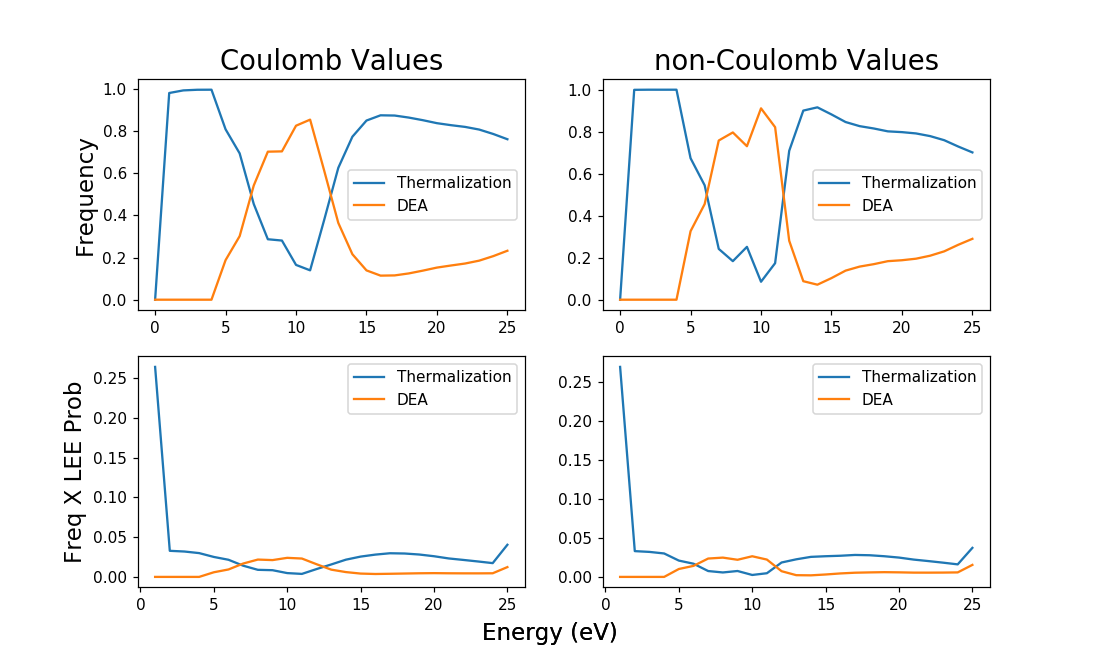

Coulomb: [0.      0.98128 0.99367 0.9967  0.99699 0.99679 0.99638 0.99641 0.98972
 0.98501 0.99123 0.99424 0.99164 0.99054 0.98969 0.9897  0.98968 0.98963
 0.98938 0.99022 0.99052 0.99094 0.99211 0.99316 0.9936  0.99421]
non-Coulomb: [0.      0.99939 0.99995 0.99992 0.99998 0.99998 0.99998 0.99998 0.97996
 0.98255 0.99671 0.99538 0.98962 0.98858 0.98744 0.98503 0.98446 0.98407
 0.98452 0.98512 0.98585 0.98698 0.9885  0.98974 0.99082 0.99123 0.99144
 0.99288 0.9933  0.99342 0.99281 0.99361 0.99345 0.99362 0.9936  0.99392
 0.99341 0.99396 0.99392 0.99368 0.99349 0.99424 0.99407 0.99385 0.99428
 0.99427 0.99442 0.99482 0.99455 0.99491 0.99474 0.99493 0.9951  0.9951
 0.99468 0.99524 0.99488 0.99489 0.99463 0.99454 0.99477 0.99484 0.99488
 0.99479 0.9949  0.99457 0.99482 0.99501 0.99488 0.99538 0.99491 0.99492
 0.99532 0.99519 0.99506 0.99462 0.99478 0.99508 0.9948  0.99452 0.99491
 0.99498 0.99475 0.99497 0.99489 0.99481 0.99466 0.99483 0.99526 0.99541
 0.99494 0.99518 0.99505 0.99544 0.99

In [50]:
fig1 = plt.figure(figsize=(10,6))

lgnd_labels = ('Thermalization', 'DEA' )

ax1= fig1.add_subplot(221)

plt.plot(freq_values_C[:,0], thermalization_C[:])
plt.plot(freq_values_C[:,0], DEA_C[:])
ax1.legend(lgnd_labels)
ax1.set_title('Coulomb Values', fontsize = 18)
ax1.set_ylabel("Frequency", fontsize = 15)

ax1= fig1.add_subplot(222)

plt.plot(freq_values[0:26,0], thermalization[0:26])
plt.plot(freq_values[0:26,0], DEA[0:26])
ax1.legend(lgnd_labels)
ax1.set_title('non-Coulomb Values', fontsize = 18)
fig1.text(0.5, 0.04, 'Energy (eV)', ha='center', va='center', fontsize=15)

ax1= fig1.add_subplot(223)

plt.plot(freq_values_C[1:26,0], thermalization_C[1:26]*lee_freq["Frequency"])
plt.plot(freq_values_C[1:26,0], DEA_C[1:26]*lee_freq["Frequency"])
ax1.legend(lgnd_labels)
ax1.set_ylabel("Freq X LEE Prob", fontsize = 15)

ax1= fig1.add_subplot(224)

plt.plot(freq_values[1:26,0], thermalization[1:26]*lee_freq["Frequency"])
plt.plot(freq_values[1:26,0], DEA[1:26]*lee_freq["Frequency"])
ax1.legend(lgnd_labels)
fig1.text(0.5, 0.04, 'Energy (eV)', ha='center', va='center', fontsize=15)

plt.savefig("termination_frac.png")
print('Coulomb:', thermalization_C + DEA_C)
print('non-Coulomb:', thermalization + DEA)


<IPython.core.display.Javascript object>


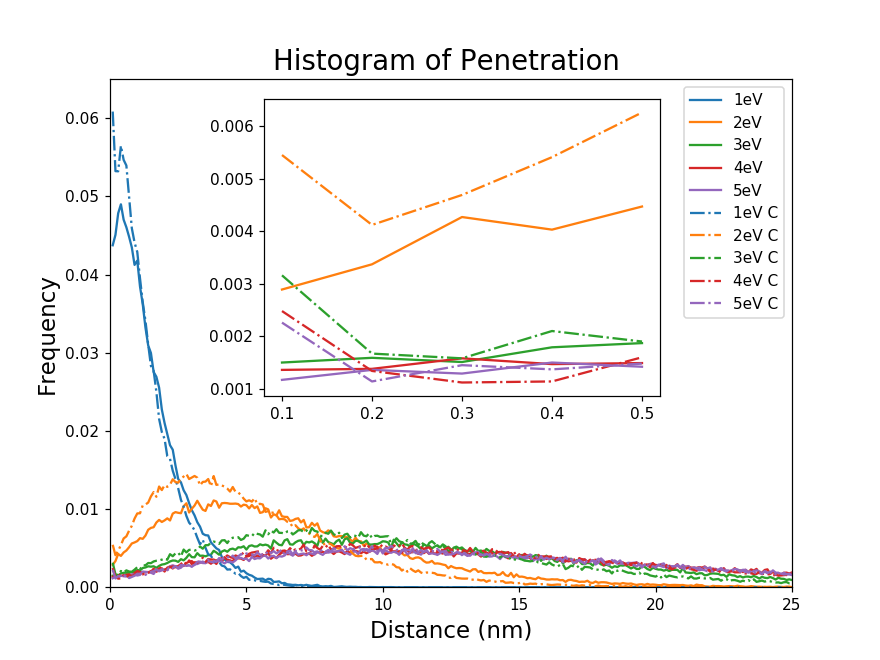

In [8]:
# plot some of the probability graphs together, interesting energies : 1,5,10,15,20,25 eV  
fig1 = plt.figure(figsize=(8,6))
ax1= fig1.add_subplot(111)

#lgnd_labels = ('1eV', '5eV', '10eV', '15eV', '20eV', '25eV', '1eV C', '2eV C', '3eV C','4eV C','5eV C' )
lgnd_labels = ('1eV', '2eV', '3eV', '4eV', '5eV', '1eV C', '2eV C', '3eV C','4eV C','5eV C' )
max_bin = 300
# plot of probability
plt.plot(average_array[0:max_bin,0], average_array[0:max_bin,1:6]) # 1 eV 
plt.gca().set_prop_cycle(None)
#plt.plot(average_array[0:max_bin,0], average_array[0:max_bin,5:30:5]) # 5 eV - 25
plt.plot(ave_arrayC[0:max_bin,0], ave_arrayC[0:max_bin,1:6], '-.')

ax1.legend(lgnd_labels)
ax1.set_title('Histogram of Penetration ', fontsize = 18)
ax1.set_ylabel("Frequency", fontsize = 15)
ax1.set_xlabel("Distance (nm)", fontsize = 15);
ax1.set_ylim(0,0.065)
ax1.set_xlim(0,25)

# this is an inset axes over the main axes
ax2 = plt.axes([.3, .4, .45, .45])
# skip the blue colour when plotting
next(ax2._get_lines.prop_cycler) 
ax2.plot(average_array[0:5,0], average_array[0:5,2:6])

# reset colours and then again skip blue- can probably be done in one line.... as in reset to index 1 and not 0
plt.gca().set_prop_cycle(None)
next(ax2._get_lines.prop_cycler)
plt.plot(ave_arrayC[0:5,0], ave_arrayC[0:5,2:6], '-.')
#plt.title('')
plt.savefig("histogram_compare.png")

<IPython.core.display.Javascript object>


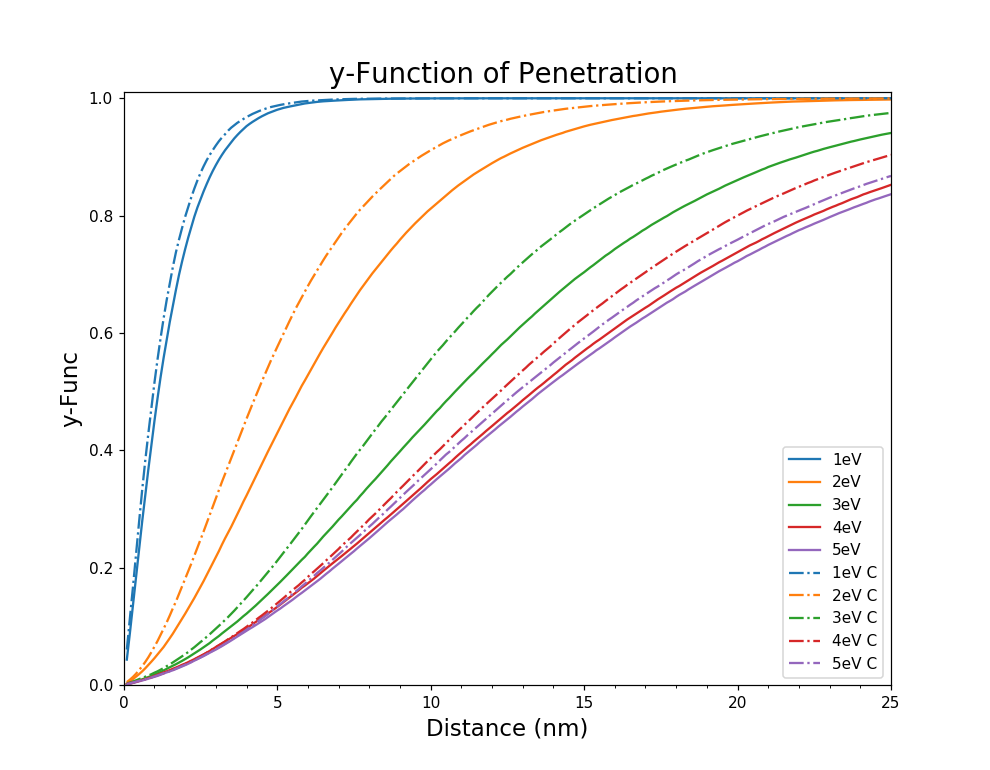

In [9]:
# plot some of the probability graphs together, interesting energies : 1,5,10,15,20,25 eV  
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

#plt.style.use('seaborn-whitegrid')

fig2 = plt.figure(figsize=(9,7))
ax2= fig2.add_subplot(111)

#lgnd_labels = ('1eV', '5eV', '10eV', '15eV', '20eV', '25eV','1eV C', '2eV C', '3eV C','4eV C','5eV C')
lgnd_labels = ('1eV', '2eV', '3eV', '4eV', '5eV', '1eV C', '2eV C', '3eV C','4eV C','5eV C' )
colours = ['r','g','b','m','y']#,'c','k','purple', 'peru', 'grey']
max_bin = 250

# plot of probability
plt.plot(y_func[0:max_bin,0], y_func[0:max_bin,1:6]) # 1 eV 
plt.gca().set_prop_cycle(None)
#plt.plot(y_func[0:max_bin,0], y_func[0:max_bin,5:30:5]) # 5 eV 
plt.plot(y_funcC[0:max_bin,0], y_funcC[0:max_bin,1:6], '-.') 
ax2.xaxis.set_minor_locator(MultipleLocator(1))

ax2.set_ylim(0,1.01)
ax2.set_xlim(0,25)
ax2.legend(lgnd_labels)
ax2.set_title('y-Function of Penetration ', fontsize = 18)
ax2.set_ylabel("y-Func", fontsize = 15)
ax2.set_xlabel("Distance (nm)", fontsize = 15);

plt.savefig("y-func_compare.png")

<IPython.core.display.Javascript object>


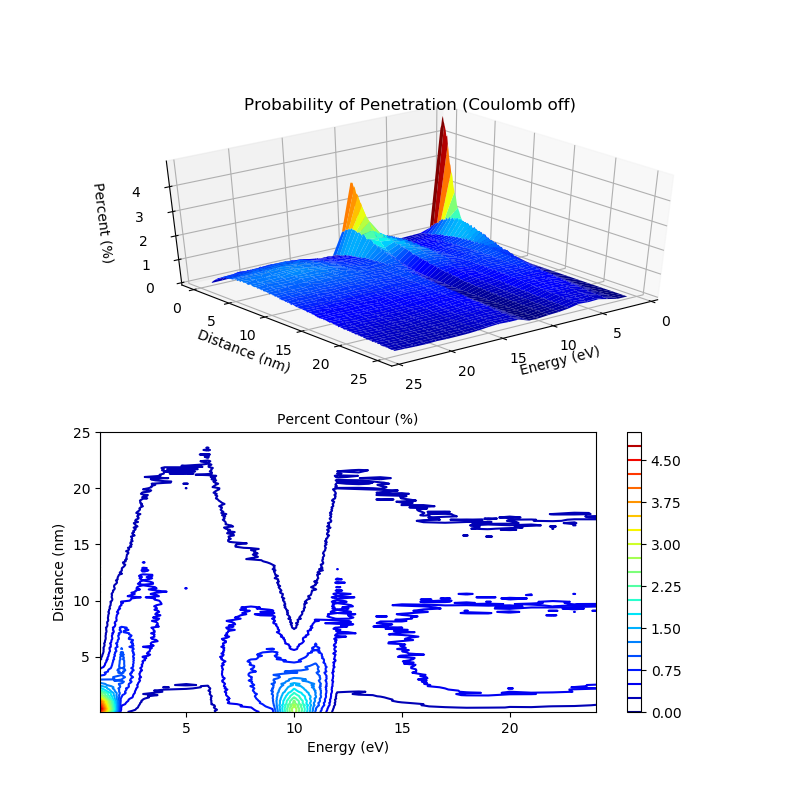

In [9]:
# make a surface plot 

fig3 = plt.figure(figsize=(8,8))
ax3= fig3.add_subplot(211, projection='3d')

N= 25
dist = 250
energy = range(1,N)

x, y = np.meshgrid(energy[:] , average_array[0:dist,0])

ax3.plot_surface(x, y, average_array[0:dist,1:N]*100, cmap='jet') #cmap='inferno', cmap='hot'

ax3.set_title('Probability of Penetration (Coulomb off)', fontsize = 12)
ax3.set_xlabel("Energy (eV)", fontsize = 10)
ax3.set_ylabel("Distance (nm)", fontsize = 10);
ax3.set_zlabel("Percent (%)", fontsize = 10)

ax3.view_init(elev=40., azim=130.)

ax3= fig3.add_subplot(212)

con = ax3.contour(x,y,average_array[0:dist,1:N]*100,20, cmap='jet')
plt.colorbar(con)
ax3.set_xlabel("Energy (eV)", fontsize = 10)
ax3.set_ylabel("Distance (nm)", fontsize = 10);
ax3.set_title("Percent Contour (%)", fontsize = 10)

plt.show()
plt.savefig("freq_srfce.png")

[[1.000e-01 4.376e-02 2.890e-03 ... 6.000e-05 3.000e-05 7.000e-05]
 [2.000e-01 4.509e-02 3.370e-03 ... 4.000e-05 1.000e-04 3.000e-05]
 [3.000e-01 4.785e-02 4.270e-03 ... 1.300e-04 1.900e-04 1.200e-04]
 ...
 [9.980e+01 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [9.990e+01 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+02 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]


<IPython.core.display.Javascript object>


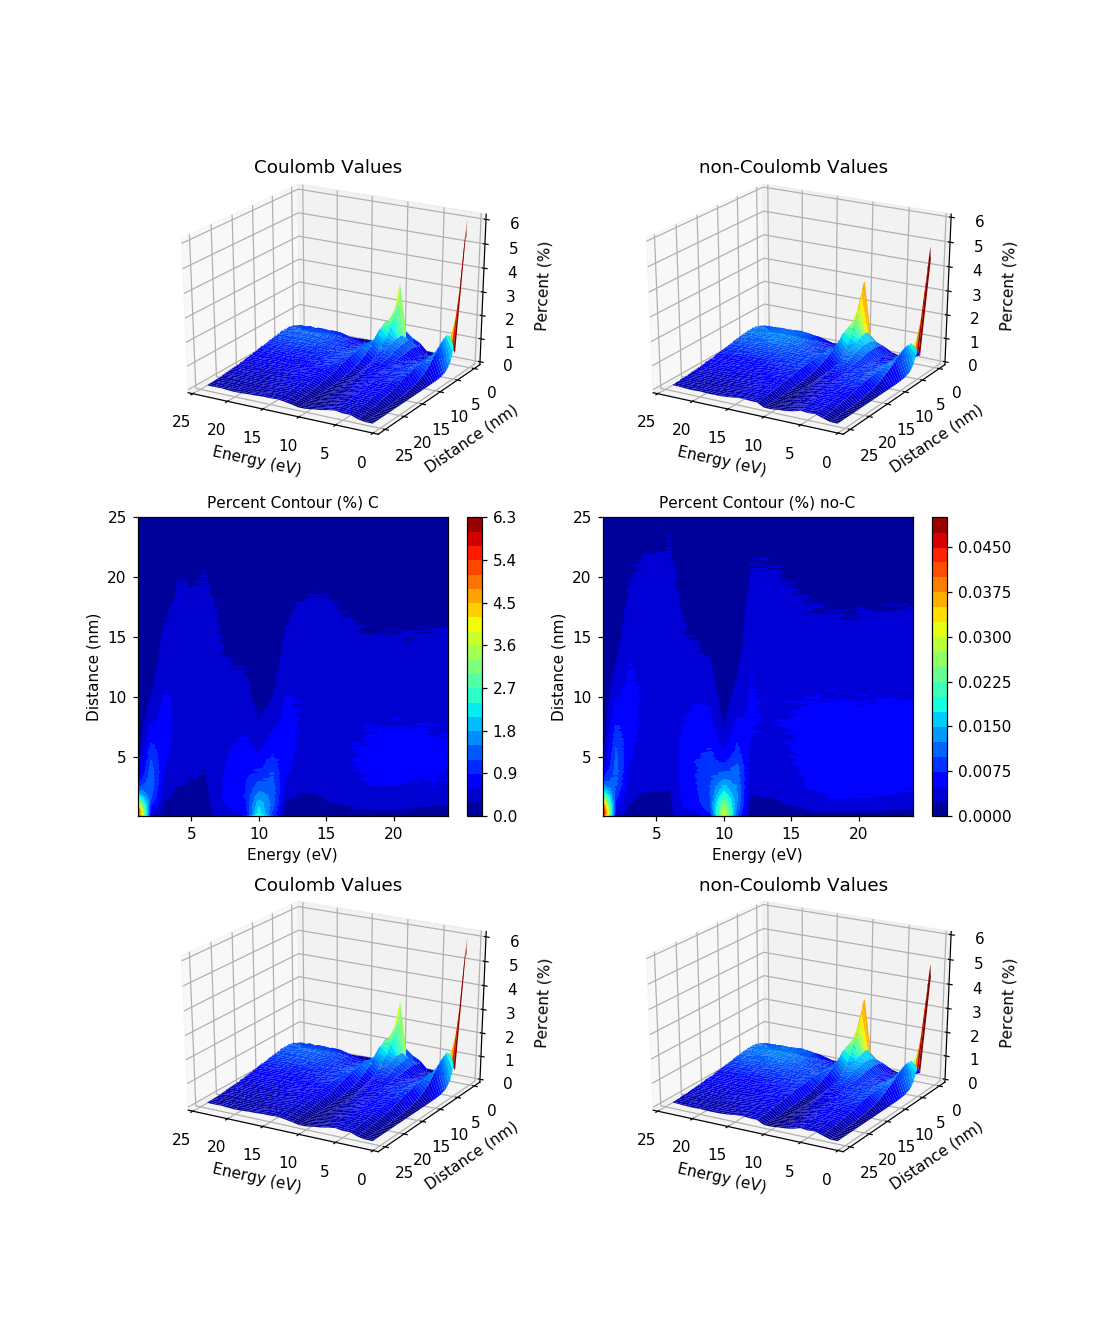

[[ 1  2  3 ... 22 23 24]
 [ 1  2  3 ... 22 23 24]
 [ 1  2  3 ... 22 23 24]
 ...
 [ 1  2  3 ... 22 23 24]
 [ 1  2  3 ... 22 23 24]
 [ 1  2  3 ... 22 23 24]] 250
[[ 0.1  0.1  0.1 ...  0.1  0.1  0.1]
 [ 0.2  0.2  0.2 ...  0.2  0.2  0.2]
 [ 0.3  0.3  0.3 ...  0.3  0.3  0.3]
 ...
 [24.8 24.8 24.8 ... 24.8 24.8 24.8]
 [24.9 24.9 24.9 ... 24.9 24.9 24.9]
 [25.  25.  25.  ... 25.  25.  25. ]] 250
[[4.376e-02 2.890e-03 1.500e-03 ... 4.800e-04 3.300e-04 2.800e-04]
 [4.509e-02 3.370e-03 1.590e-03 ... 9.500e-04 6.800e-04 7.600e-04]
 [4.785e-02 4.270e-03 1.510e-03 ... 1.500e-03 1.380e-03 1.250e-03]
 ...
 [0.000e+00 1.000e-04 9.500e-04 ... 1.200e-03 7.400e-04 1.240e-03]
 [0.000e+00 1.000e-04 1.030e-03 ... 9.100e-04 1.130e-03 1.110e-03]
 [0.000e+00 3.000e-05 9.400e-04 ... 9.700e-04 1.150e-03 1.300e-03]]
250


In [47]:
# make a surface plot 
print(average_array)
energy = range(1,25)
dist = 250
x, y = np.meshgrid(energy[:] , ave_arrayC[0:dist,0])

fig4 = plt.figure(figsize=(10,12))
ax4= fig4.add_subplot(321, projection='3d')

ax4.plot_surface(x, y, ave_arrayC[0:dist,1:25]*100, cmap='jet')

ax4.set_title('Coulomb Values ', fontsize = 12)
ax4.set_xlabel("Energy (eV)", fontsize = 10)
ax4.set_ylabel("Distance (nm)", fontsize = 10);
ax4.set_zlabel("Percent (%)", fontsize = 10);
ax4.view_init(elev=25., azim=120.)

ax4 = fig4.add_subplot(322,projection ='3d')

ax4.plot_surface(x, y, average_array[0:dist,1:25]*100, cmap='jet')
ax4.set_zlim(0,6.0)

ax4.set_title('non-Coulomb Values ', fontsize = 12)
ax4.set_xlabel("Energy (eV)", fontsize = 10)
ax4.set_ylabel("Distance (nm)", fontsize = 10);
ax4.set_zlabel("Percent (%)", fontsize = 10)
ax4.view_init(elev=25., azim=120.)

ax4= fig4.add_subplot(323)
con = ax4.contourf(x,y,ave_arrayC[0:dist,1:25]*100,20,cmap='jet')
ax4.set_xlabel("Energy (eV)", fontsize = 10)
ax4.set_ylabel("Distance (nm)", fontsize = 10);
ax4.set_title("Percent Contour (%) C",fontsize = 10)
plt.colorbar(con)

ax4= fig4.add_subplot(324)
con = ax4.contourf(x,y,average_array[0:dist,1:25],20, cmap='jet')
plt.colorbar(con)
ax4.set_xlabel("Energy (eV)", fontsize = 10)
ax4.set_ylabel("Distance (nm)", fontsize = 10);
ax4.set_title("Percent Contour (%) no-C",fontsize = 10)

ax4= fig4.add_subplot(325, projection='3d')

ax4.plot_surface(x, y, ave_arrayC[0:dist,1:25]*100, cmap='jet')

ax4.set_title('Coulomb Values ', fontsize = 12)
ax4.set_xlabel("Energy (eV)", fontsize = 10)
ax4.set_ylabel("Distance (nm)", fontsize = 10);
ax4.set_zlabel("Percent (%)", fontsize = 10);
ax4.view_init(elev=25., azim=120.)

ax4 = fig4.add_subplot(326,projection ='3d')

ax4.plot_surface(x, y, average_array[0:dist,1:25]*100, cmap='jet')
ax4.set_zlim(0,6.0)

ax4.set_title('non-Coulomb Values ', fontsize = 12)
ax4.set_xlabel("Energy (eV)", fontsize = 10)
ax4.set_ylabel("Distance (nm)", fontsize = 10);
ax4.set_zlabel("Percent (%)", fontsize = 10)
ax4.view_init(elev=25., azim=120.)


plt.show()
plt.savefig("freq_srfce_compare.png")
print(x, len(x))
print(y, len(y))
print(average_array[0:dist,1:25])
print(len(average_array[0:dist,1:25]))

<IPython.core.display.Javascript object>


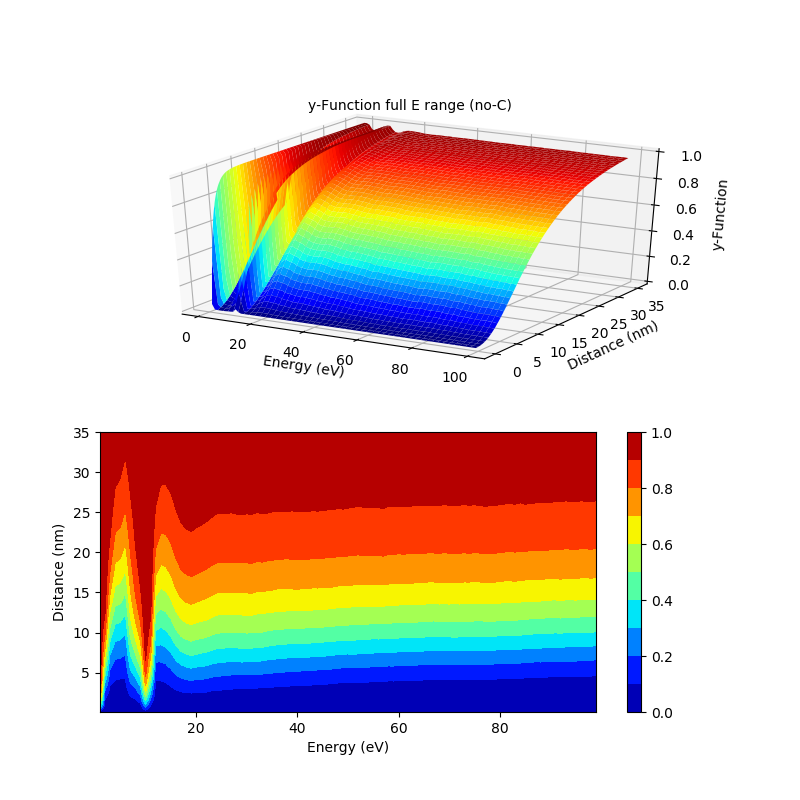

(350, 99) 2
(350, 99) 2
(1000, 101) 2


In [11]:
# make a surface plot 

fig4 = plt.figure(figsize=(8,8))
ax4= fig4.add_subplot(211, projection='3d')

N=100
dist = 350
energy = range(1,N)
en = range(1,25)

x, y = np.meshgrid(energy[:] , y_func[0:dist,0])
x1,y1 = np.meshgrid(en[:] , y_func[0:dist,0])
print(x.shape, x.ndim)
print(y.shape, y.ndim)

print(average_array.shape, average_array.ndim)

ax4.plot_surface(x, y, y_func[0:dist,1:N],cmap = 'jet')

#ax4.set_title('Probability of Penetration', fontsize = 12)
ax4.set_xlabel("Energy (eV)", fontsize = 10)
ax4.set_ylabel("Distance (nm)", fontsize = 10);
ax4.set_zlabel("y-Function", fontsize = 10)
ax4.set_title("y-Function full E range (no-C)", fontsize = 10)
ax4.view_init(elev=30., azim=300.)

ax4= fig4.add_subplot(212)
con = ax4.contourf(x,y,y_func[0:dist,1:N],10, cmap='jet')
plt.colorbar(con)
ax4.set_xlabel("Energy (eV)", fontsize = 10)
ax4.set_ylabel("Distance (nm)", fontsize = 10);


plt.show()
plt.savefig("y-func_srfce.png")

<IPython.core.display.Javascript object>


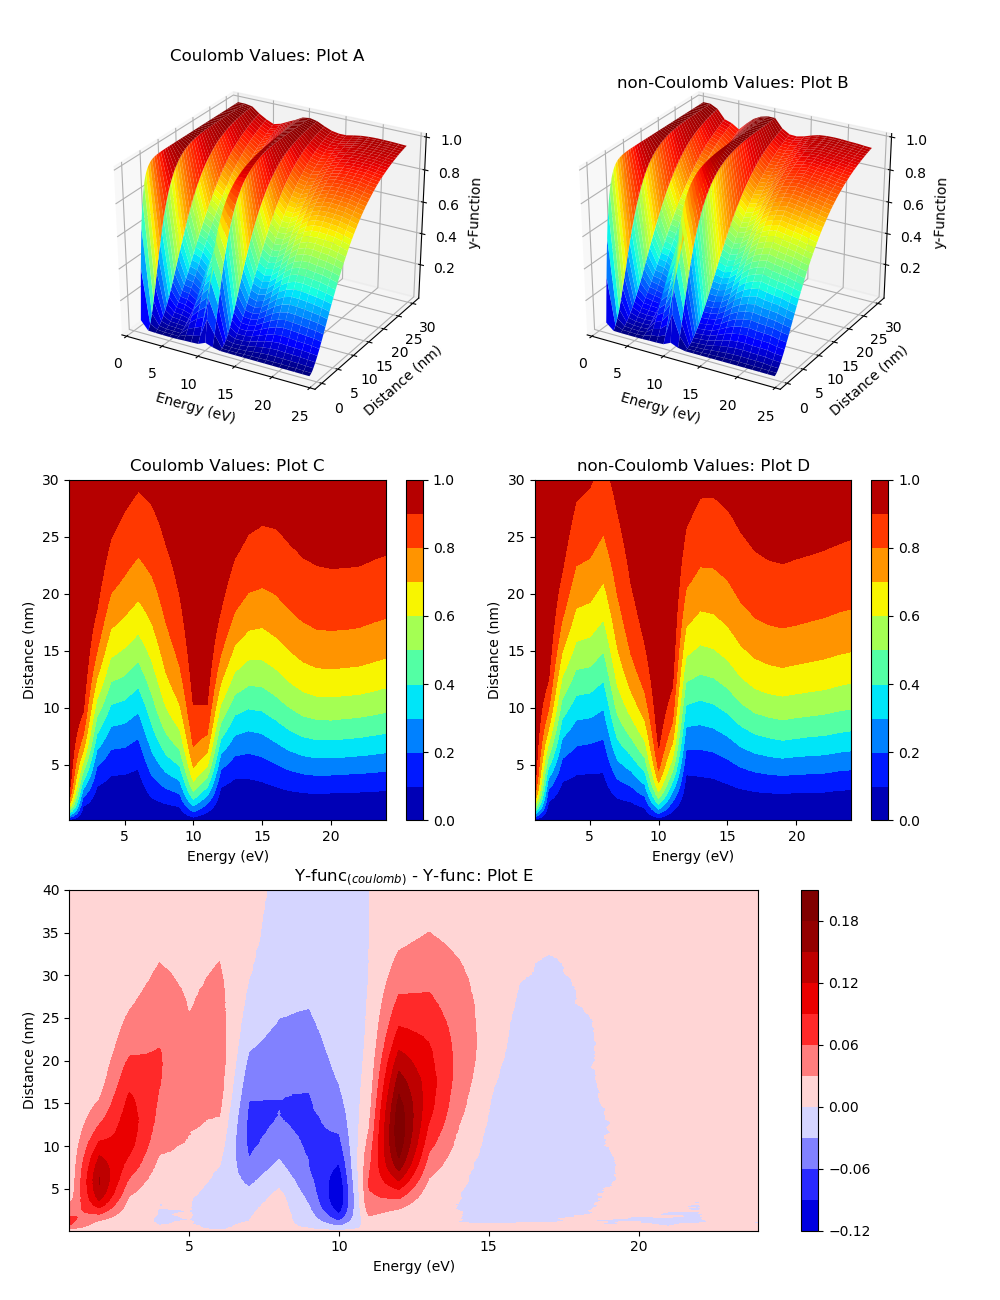

In [30]:
# make a surface plot 

fig5 = plt.figure(figsize=(10,13))
ax5= fig5.add_subplot(321, projection='3d')

fig5.tight_layout(pad=5.0)
energy = range(1,25)
dist = 400

x, y = np.meshgrid(energy[:] , y_func[0:300,0])
x1,y1 = np.meshgrid(en[:] , y_func[0:dist,0])

ax5.plot_surface(x, y, y_funcC[0:300,1:25],cmap = 'jet')

ax5.set_title('Coulomb Values: Plot A', fontsize = 12)
ax5.set_xlabel("Energy (eV)", fontsize = 10)
ax5.set_ylabel("Distance (nm)", fontsize = 10);
ax5.set_zlabel("y-Function", fontsize = 10)

ax5= fig5.add_subplot(322, projection='3d')

ax5.plot_surface(x, y, y_func[0:300,1:25],cmap = 'jet')

ax5.set_title('non-Coulomb Values: Plot B', fontsize = 12)
ax5.set_xlabel("Energy (eV)", fontsize = 10)
ax5.set_ylabel("Distance (nm)", fontsize = 10);
ax5.set_zlabel("y-Function", fontsize = 10)

ax5= fig5.add_subplot(323)
con = ax5.contourf(x,y,y_funcC[0:300,1:25],10,cmap='jet')
ax5.set_title('Coulomb Values: Plot C', fontsize = 12)
ax5.set_xlabel("Energy (eV)", fontsize = 10)
ax5.set_ylabel("Distance (nm)", fontsize = 10);
plt.colorbar(con)

ax5= fig5.add_subplot(324)
con = ax5.contourf(x,y,y_func[0:300,1:25],10,cmap='jet')
ax5.set_title('non-Coulomb Values: Plot D', fontsize = 12)
ax5.set_xlabel("Energy (eV)", fontsize = 10)
ax5.set_ylabel("Distance (nm)", fontsize = 10);
plt.colorbar(con)

ax5= fig5.add_subplot(313)
con = ax5.contourf(x1,y1,y_funcC[0:dist,1:25] - y_func[0:dist,1:25],10, cmap='seismic')
con.set_clim(-0.18,0.18)
plt.colorbar(con)
ax5.set_title(r'Y-func$_{(coulomb)}$ - Y-func: Plot E', fontsize = 12)
ax5.set_xlabel("Energy (eV)", fontsize = 10)
ax5.set_ylabel("Distance (nm)", fontsize = 10);

plt.show()
plt.savefig("y-func_srfce_compare.png")

In [13]:

fig2 = plt.figure(figsize=(8,8)) #figsize=(6,6)
ax = fig2.add_subplot(111, projection='3d')

nbins = 20
val_z = range(0,100)
val_y = range(1,101)
tick_Num = range(0,100,10)
print(val_z)

extnd_values = ['r','g','b','m','y','c','k','purple', 'peru', 'grey']
colours = ['r','g','b','m','y','c','k','purple', 'peru', 'grey']
for x in range(0,10):
    colours.extend(extnd_values)

for c, z in zip(colours,val_z):

    hist, bins = np.histogram(test[z,:,1], bins=nbins)
    xs = (bins[:-1] + bins[1:])/2

    ax.bar(xs, hist, zs=z, zdir='y', color=c, ec=c, alpha=0.8)
    

ax.set_xlabel('Distance (nm)')
ax.set_ylabel('Energy (eV)')
ax.set_zlabel('Frequency')
ax.set_yticks(tick_Num)
plt.show()

<IPython.core.display.Javascript object>

range(0, 100)


NameError: name 'test' is not defined

In [ ]:
# calculate some averages 

pene_mean = stat.mean(test[0,:,1])
mean_sd = stat.stdev(test[0,:,1])
mean_ci = mean_sd*1.972/np.sqrt(200) # 95% confidence
print(pene_mean, 'p/m', mean_sd, 'ci', mean_ci)

pene_median = stat.median(test[0,:,1])
print(pene_median) 

round_pene = np.zeros(200)

for x in range(0,200):
    round_pene[x] = round(test[0,x,1],2)

pene_mode = stat.mode(round_pene)
print(pene_mode)

In [ ]:
# calc averages for all of the penetration data 

total_pene = np.zeros((100,5))
round_pene = np.zeros((100,200))

for ene in range(0,100):
    print(ene)
    #calc my own CI  at 95% (90%-> alpha = 1.652)
    # first need to calc rounded numbers for taking the mode 
    for x in range(0,200):
        round_pene[ene,x] = round(test[ene,x,1],1)
    
    total_pene[ene,0] = stat.mean(test[ene,:,1])
    total_pene[ene,1] = stat.stdev(test[ene,:,1])
    total_pene[ene,2] = total_pene[ene,1]*1.972/np.sqrt(200)
    total_pene[ene,3] = stat.median(test[ene,:,1])
    total_pene[ene,4] = stat.mode(round_pene[ene,:]) # round numbers to 2 sig figs
    
print(total_pene[1:6,:])